In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dat

In [2]:
info=pd.read_csv("fifa_+variable_information (1).csv")

In [3]:
df=pd.read_csv("fifa (1).csv")
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

# ``Data Preprocessing``

### 1. For `Value`

In [5]:
df['Value'].isnull().sum()

0

In [6]:
df['Value']=df['Value'].apply(lambda x:x.replace('€',''))

In [7]:
#Function for conversion
def currency(a):
    xx=a[-1]
    num=a.split(xx)[0]
    if xx=="M":
        return float(num)*1000000
    if xx=="K":
        return float(num)*1000

In [8]:
df['Value']=df['Value'].apply(currency)

### 2.For `Wage`

In [9]:
df['Wage'].isnull().sum()

0

In [10]:
df['Wage']=df['Wage'].apply(lambda x:x.replace('€',''))

In [11]:
df['Wage']=df['Wage'].apply(currency)

### 3.For `Joined`

In [12]:
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [13]:
df['Joined'].isnull().sum()

1553

In [14]:
df['Joined']=df["Joined"].apply(lambda x:str(x).split(',')[-1]).apply(lambda x: np.nan if len(x)==3 else int(x))

In [15]:
mean_Joined = int(df['Joined'].mean(skipna=True))
mean_Joined

2016

In [16]:
df['Joined']=df['Joined'].fillna(mean_Joined)

In [17]:
df['Joined'].astype('int')

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

### 4. For `Contract Valid Until`

In [18]:
df['Contract Valid Until']

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: object

In [19]:
df['Contract Valid Until'].isnull().sum()

289

In [20]:
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])

In [21]:
mean_contract=df['Contract Valid Until'].dt.year.mean(skipna=True)
mean_contract=dat.datetime(int(mean_contract),1,1)
mean_contract

datetime.datetime(2020, 1, 1, 0, 0)

In [22]:
df['Contract Valid Until'].fillna(mean_contract,inplace=True)

### 5. For `Height`

In [23]:
df['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [24]:
df['Height'].isnull().sum()

48

In [25]:
df["Height"]=df['Height'].apply(lambda x: str(x).split("'")).apply(lambda x:float(x[0])+float(x[-1])/12)

In [26]:
mean_height=df["Height"].mean(skipna=True)
mean_height

5.94677111441519

In [27]:
df['Height'].fillna(mean_height,inplace=True)

### 6. For `Weight`

In [28]:
df['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [29]:
df['Weight'].isnull().sum()

48

In [30]:
df['Weight']=df['Weight'].apply(lambda x:str(x).split("l")).apply(lambda x:float(x[0]))

In [31]:
mean_weight =df['Weight'].mean(skipna=True)
mean_weight

165.97912880665234

In [32]:
df['Weight'].fillna(mean_weight,inplace=True)

### 7. For `Release Clause`

In [33]:
df['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

In [34]:
df['Release Clause'].isnull().sum()

1564

In [35]:
df['Release Clause']=df['Release Clause'].apply(lambda x:str(x).replace('€','')).apply(currency)

In [36]:
mean_Release_clause=df['Release Clause'].mean(skipna=True)
mean_Release_clause

4585060.986600974

In [37]:
df['Release Clause'].fillna(mean_Release_clause,inplace=True)

# ``Exploratory Analysis``

#### Distrubution of Overall ratings with Pouplation

Text(0.5, 1.0, 'Overall Ratings Distribution')

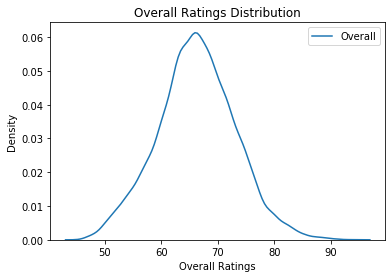

In [38]:
sns.kdeplot(data=df['Overall'])
plt.xlabel("Overall Ratings")
plt.ylabel('Density')
plt.title("Overall Ratings Distribution")

#### Pair wise representation of some factors

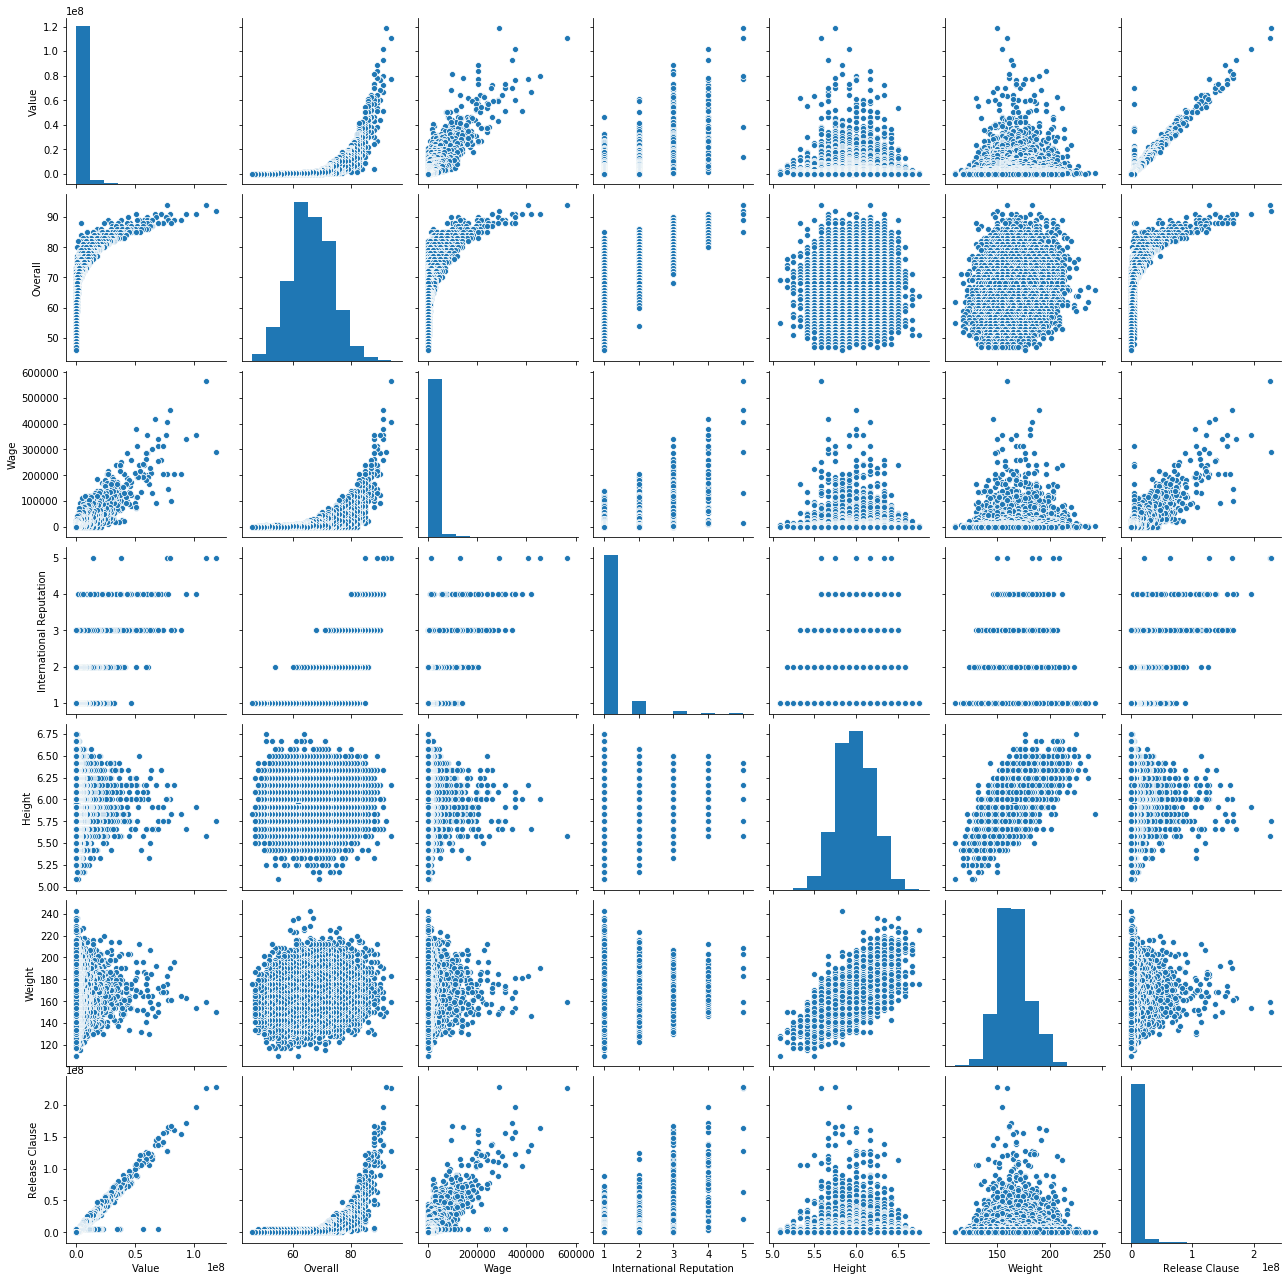

In [40]:
pairplot=df[['Value','Overall','Wage',"International Reputation",'Height','Weight','Release Clause']]
sns.pairplot(pairplot)

#### Top 20 Players whose contract expires in 2020

In [148]:
top_20=df[df['Contract Valid Until'].dt.year ==2020].sort_values('Overall',ascending=False).head(20)

In [130]:
top_20[['Name',"Position","Overall","Wage",'Club',"Nationality"]].sort_values(by="Overall",ascending=False)

,Name,Position,Overall,Wage,Club,Nationality
3,De Gea,GK,91,260000.0,Manchester United,Spain
8,Sergio Ramos,RCB,91,380000.0,Real Madrid,Spain
5,E. Hazard,LF,91,340000.0,Chelsea,Belgium
6,L. Modrić,RCM,91,420000.0,Real Madrid,Croatia
13,David Silva,LCM,90,285000.0,Manchester City,Spain
21,E. Cavani,LS,89,200000.0,Paris Saint-Germain,Uruguay
24,G. Chiellini,LCB,89,215000.0,Juventus,Italy
31,C. Eriksen,CAM,88,205000.0,Tottenham Hotspur,Denmark
39,Thiago Silva,RCB,88,165000.0,Paris Saint-Germain,Brazil
49,Jordi Alba,LB,87,250000.0,FC Barcelona,Spain


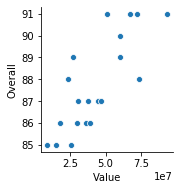

In [147]:
sns.pairplot(y_vars="Overall",x_vars="Value",data=top_20)

#### Top 5 Players for each Position

In [111]:
top_5=df.groupby("Position").head(5)[['Position',"Overall",'Name',"Age","Nationality",
                                'Club','Wage']].sort_values(by=['Position','Overall'],ascending=[True,False])
top_5.head(12)

,Position,Overall,Name,Age,Nationality,Club,Wage
17,CAM,89,A. Griezmann,27,France,Atlético Madrid,145000.0
31,CAM,88,C. Eriksen,26,Denmark,Tottenham Hotspur,205000.0
61,CAM,86,Roberto Firmino,26,Brazil,Liverpool,195000.0
66,CAM,86,T. Müller,28,Germany,FC Bayern München,135000.0
74,CAM,86,M. Özil,29,Germany,Arsenal,190000.0
12,CB,90,D. Godín,32,Uruguay,Atlético Madrid,125000.0
42,CB,87,S. Umtiti,24,France,FC Barcelona,205000.0
73,CB,86,M. Benatia,31,Morocco,Juventus,160000.0
89,CB,85,N. Otamendi,30,Argentina,Manchester City,170000.0
102,CB,85,Naldo,35,Brazil,FC Schalke 04,38000.0


#### Expected(Mean) Wages For each Position Player

In [117]:
top_5.groupby('Position').mean().sort_values(by="Wage",ascending=False)

,Overall,Age,Wage
Position,,,
ST,90.0,28.8,294000.0
LW,88.4,25.4,261000.0
RCM,87.8,27.0,240800.0
RCB,87.6,30.4,231000.0
CDM,86.6,28.0,217000.0
RW,85.4,24.8,202000.0
GK,89.6,27.2,192800.0
LCM,87.4,27.6,184400.0
LB,86.2,28.8,177200.0
